In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/walmart_data.csv')

In [4]:
#Check data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [6]:
df.describe(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [7]:
#Conversion to categorical variable
df['Gender']=df.Gender.astype('category')
df.Gender.dtype

CategoricalDtype(categories=['F', 'M'], ordered=False)

In [8]:
df['City_Category']=df.City_Category.astype('category')

In [9]:
df['Marital_Status']=df.Marital_Status.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  object  
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(3), int64(4), object(3)
memory usage: 31.0+ MB


In [10]:
df['Age']=df.Age.astype('category')

In [11]:
df['Stay_In_Current_City_Years']=df.Stay_In_Current_City_Years.astype('category')

In [12]:
#Get shape
df.shape

(550068, 10)

There are 550068 rows and 10 columns found

In [13]:
#Check missing values
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [14]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Observation:There are no Null values and not available values found

In [15]:
#Check value counts and unique attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(4), object(1)
memory usage: 23.6+ MB


In [16]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

Observation:


1.   There are 5891 unique user ID
2.   There are 3631 unique product ID
3.   There are 2 unique Gender
4.   There are 7 unique age groups
5.   There are 21 unique occupation
6.   There are 3 unique city category
7.   There are 5 unique stay in current city years
8.   There are 2 unique marital status
9.   There are 20 unique Product category
10.   There are 18105 unique purchases



In [17]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

Observation:

Males:414259
Female:135809

In [18]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

3 cities found

B -   231173

C  -  171175

A   - 147720

In [19]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

Married people:225337
Unmarried people:324731

In [20]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [21]:

df.select_dtypes(include=object)

,Product_ID
0,P00069042
1,P00248942
2,P00087842
3,P00085442
4,P00285442
...,...
550063,P00372445
550064,P00375436
550065,P00375436
550066,P00375436


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(4), object(1)
memory usage: 23.6+ MB


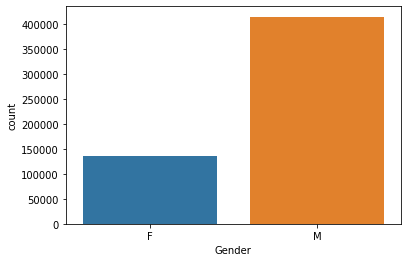

In [23]:
#univariate Analysis
sns.countplot(x='Gender',data=df)


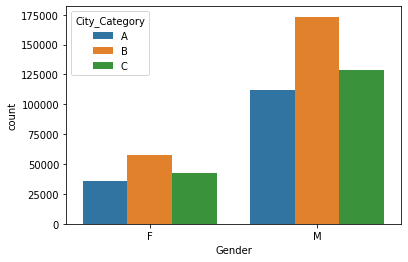

In [24]:
#Representation of Gender with respect to City
sns.countplot(x='Gender',hue='City_Category',data=df)

Observation:
B city has more male customers followed bt C and A
B city has more female customers followed by C and A

Overall,B city has got more customers .

It seems men are spending more time in shopping

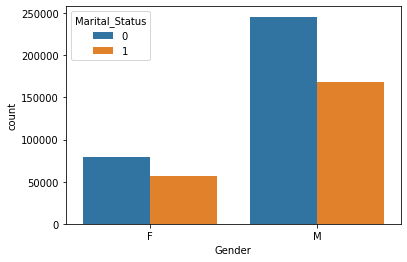

In [25]:
#Representation of marital status with respect to customer in shopping
sns.countplot(x='Gender',hue='Marital_Status',data=df)

Observation:

We have got more single persons in male than female

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(4), object(1)
memory usage: 23.6+ MB


In [27]:
#Get top 5 selling products
df1=df.Product_ID.value_counts().reset_index()
df2=df1.head(5)
df2

,index,Product_ID
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470


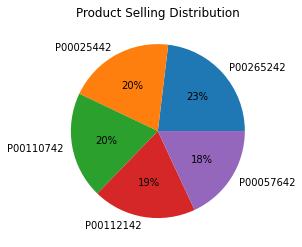

In [28]:
#Get pie chart to represent this
data=list(df2['Product_ID'])
keys=list(df2['index'])
plt.pie(data,labels=keys, autopct='%.0f%%')
plt.title('Product Selling Distribution')
plt.show()

Observation:

Highest selling product us P00265242 with 23% Sales

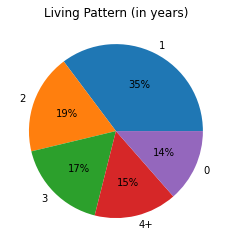

In [29]:
#People living in same city yearwise distribution
df_year=df.Stay_In_Current_City_Years.value_counts().reset_index()
data=list(df_year['Stay_In_Current_City_Years'])
keys=list(df_year['index'])
plt.pie(data,labels=keys,autopct='%.0f%%')
plt.title('Living Pattern (in years)')
plt.show()


Observation:

People living in the city for 1 year is buying more

In [30]:
#Top buying and Least Buying customers based on purchase value
df_customer=df.groupby('User_ID')['Purchase'].sum().sort_values(ascending=False)
df_customer=df_customer.reset_index()
highest_spender=df_customer.max()['User_ID']

Top Buying customer is 1004277 with purchase value:10536909

Least Buying customer is 1004464 with purchase value:46681

In [31]:
df_spending=df.groupby('User_ID')['Purchase'].mean().sort_values(ascending=False)
df_spending

User_ID
1003902    18577.893617
1005069    18490.166667
1005999    18345.944444
1001349    18162.739130
1003461    17508.700000
               ...     
1004636     3612.812500
1005944     3599.733333
1002744     3421.521739
1003598     2698.357143
1004486     2318.733333
Name: Purchase, Length: 5891, dtype: float64

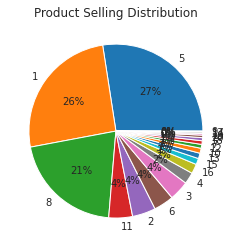

In [95]:
#Product category
#Get pie chart to represent this
df1=df.Product_Category.value_counts().reset_index()
data=list(df1['Product_Category'])
keys=list(df1['index'])
plt.pie(data,labels=keys, autopct='%.0f%%')
plt.title('Product Selling Distribution')
plt.show()

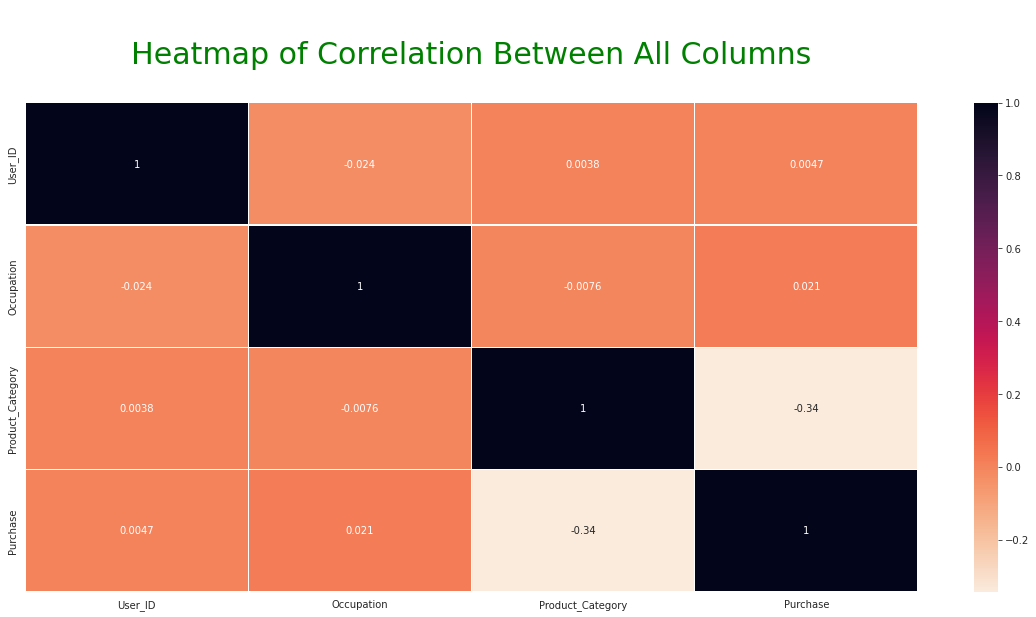

In [96]:
fig, ax = plt.subplots(figsize=(20,9))
sns.heatmap(df.corr(), linewidths=.5, cmap=sns.cm.rocket_r, annot=True, ax=ax)
plt.title("\nHeatmap of Correlation Between All Columns\n", fontsize=30, color="green")
plt.show()

In [32]:
df[df['User_ID']==highest_spender].describe()

,User_ID,Occupation,Product_Category,Purchase
count,180.0,180.0,180.000000,180.000000
mean,1006040.0,6.0,6.338889,9184.994444
std,0.0,0.0,3.321109,5242.108229
min,1006040.0,6.0,1.000000,945.000000
25%,1006040.0,6.0,5.000000,5922.500000
50%,1006040.0,6.0,6.000000,7973.000000
75%,1006040.0,6.0,8.000000,11733.250000
max,1006040.0,6.0,16.000000,23251.000000


Analysis on Highest spender(Customer id:1004277)


*   Totally he shopped 180 times
*   On an average he spent 9185 on purchase
*   His maximum spending is 23251
*   His minimum spending is 945




Observation:

On an average,1003902 spends more with value(18577.9) and 1004486 spends less(2318.733)

In [33]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [34]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [35]:
df_agewise=df.groupby('Age')['Purchase'].sum().reset_index()
df_agewise

,Age,Purchase
0,0-17,134913183
1,18-25,913848675
2,26-35,2031770578
3,36-45,1026569884
4,46-50,420843403
5,51-55,367099644
6,55+,200767375


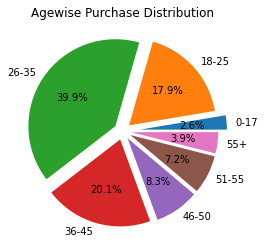

In [36]:
data=list(df_agewise['Purchase'])
keys=list(df_agewise['Age'])
myexplode =  (0.2, 0.1, 0.1, 0.1, 0.1,0.1 ,0.1)
plt.pie(x=data,labels=keys,autopct='%.1f%%',explode=myexplode)
plt.title('Agewise Purchase Distribution')
plt.show()

Observation:

Major customer base belongs to the age group 26-35 with 39.9%

Nearly 78% of customers belong to age group 18-45

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(4), object(1)
memory usage: 23.6+ MB


Text(0.5, 1.0, 'Purchase Distribution')

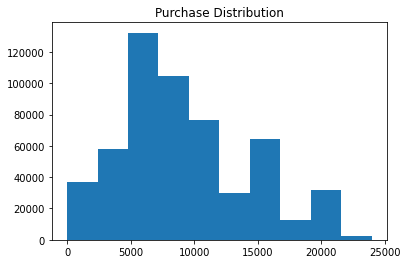

In [38]:
count, bins,_=plt.hist(df['Purchase'])
plt.title('Purchase Distribution')

It seems more buying is seen on particular product.It might be because of following reasons:

1.Product is more popular

2.Discount is given on that product

In [39]:
bins

array([1.20000e+01, 2.40690e+03, 4.80180e+03, 7.19670e+03, 9.59160e+03,
       1.19865e+04, 1.43814e+04, 1.67763e+04, 1.91712e+04, 2.15661e+04,
       2.39610e+04])

### Bivariant Analysis

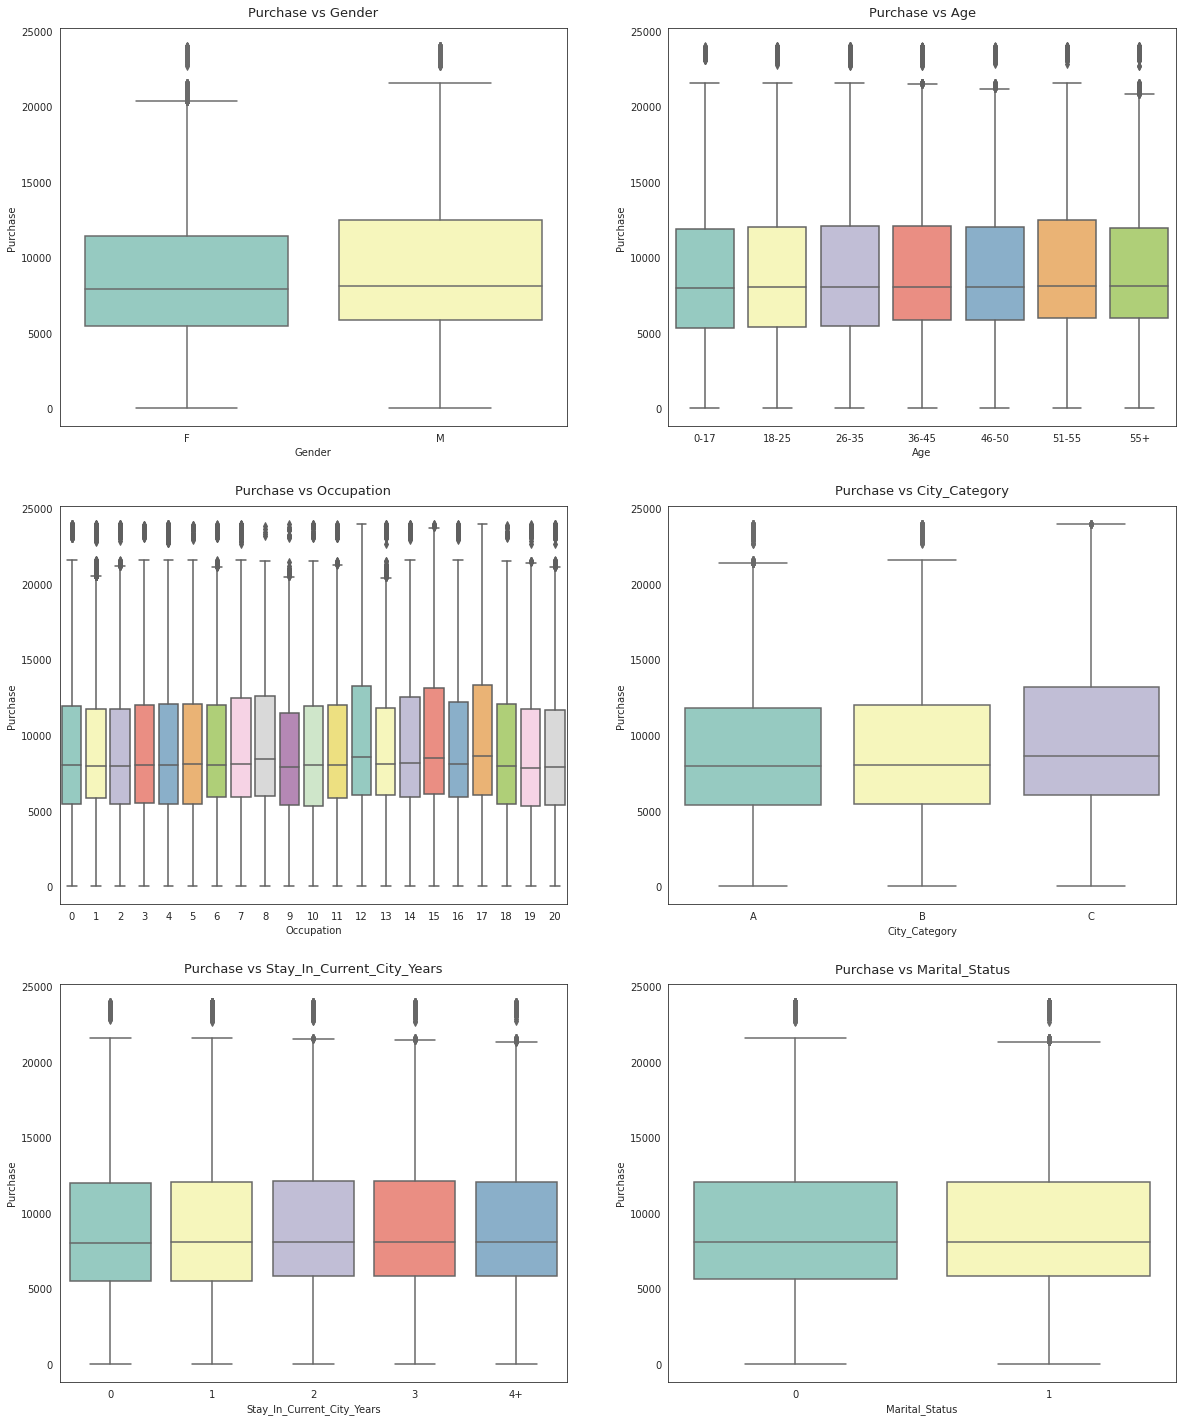

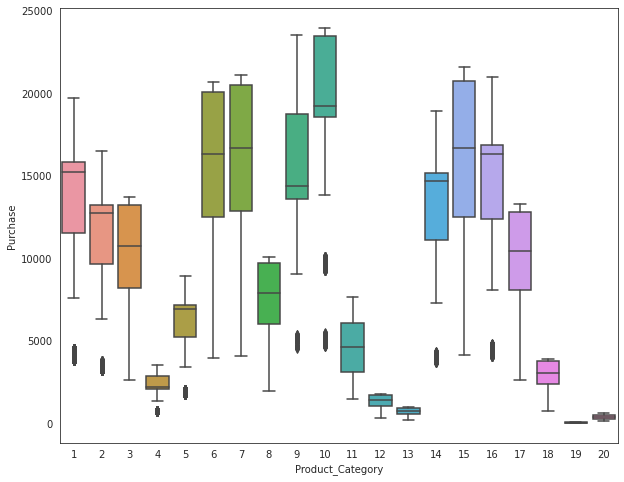

In [40]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axis[row, col], palette='Set3')
        axis[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1])
plt.show()

### Multivariant Analysis



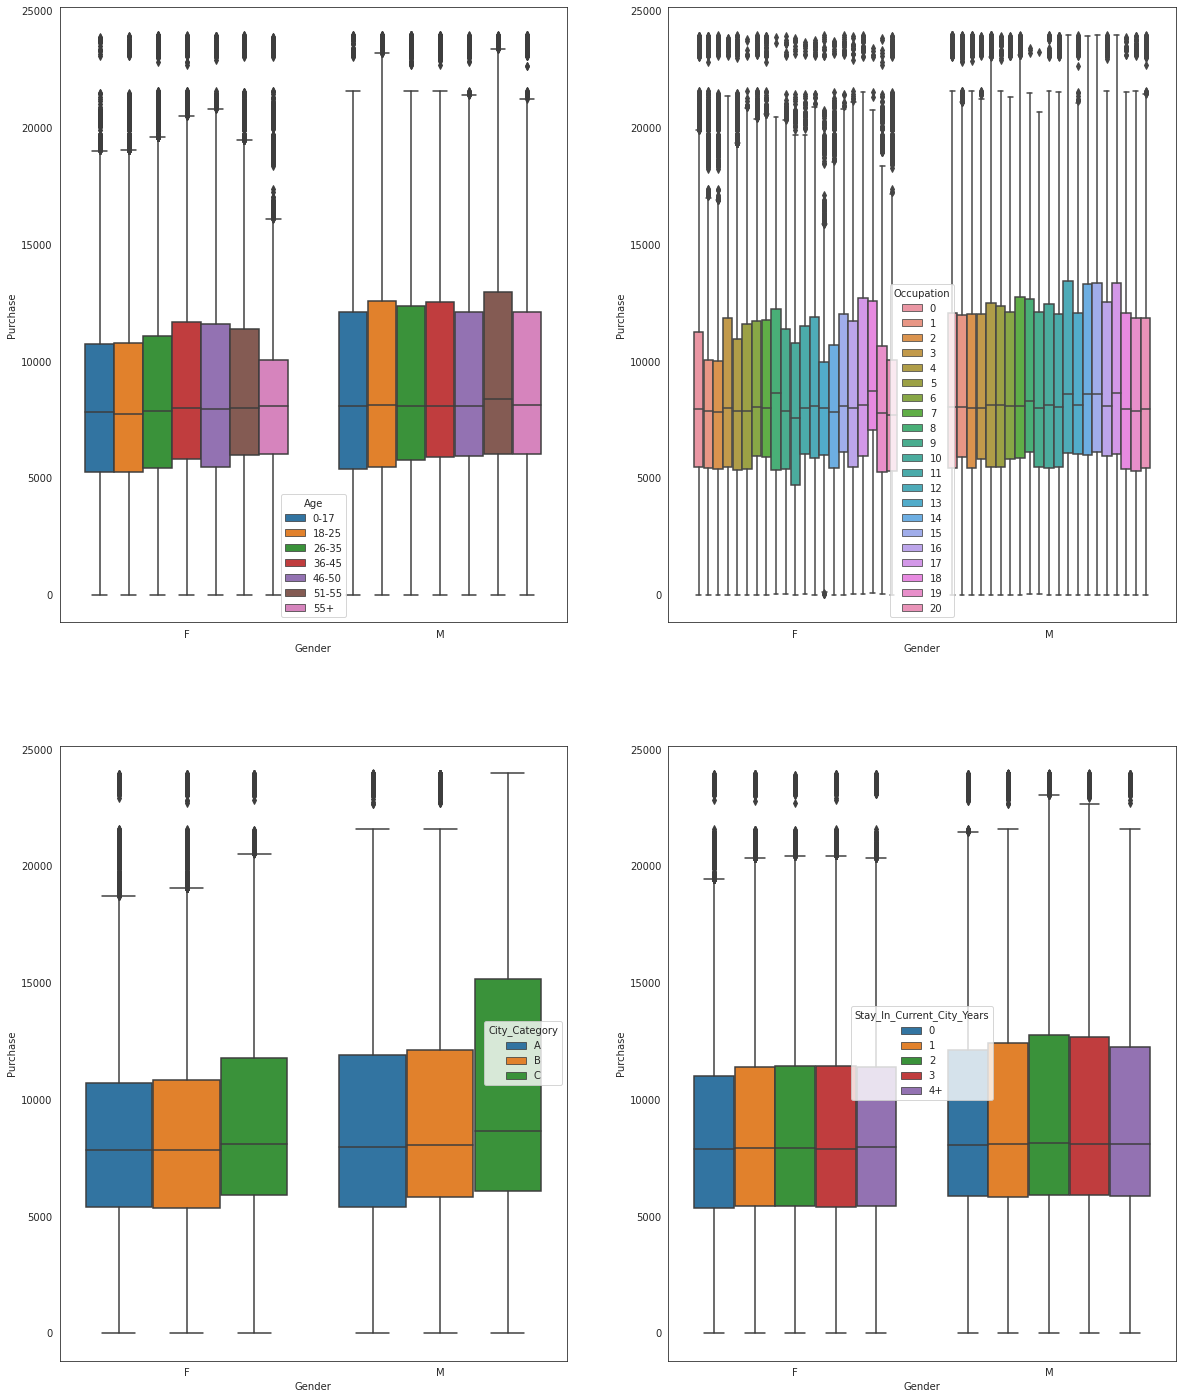

In [41]:
sns.set_style("white")
attr=['Age','Occupation','City_Category','Stay_In_Current_City_Years', 'Marital_Status']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count=0
for row in range(2):
  for col in range(2):
    sns.boxplot(data=df, y='Purchase', x='Gender', ax=axis[row,col],hue=attr[count] )

    count+=1
plt.show()


## Outlier Detection

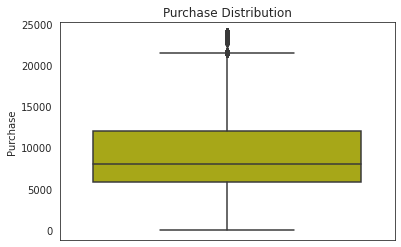

In [42]:
#Outlier Detection
sns.boxplot(data=df,y='Purchase',color='y')
plt.title('Purchase Distribution')
plt.show()

Most purchase made around the average of 10000

Mostly purchased range is between 5000-15000

In [43]:
#Check number of outliers in purchase
iqr=df.Purchase.describe()['75%']-df.Purchase.describe()['25%']
outlier=df.Purchase.describe()['75%']+1.5*iqr
print(str('outlier_value:')+str(outlier))
df[df['Purchase']>=outlier]['Purchase'].count()

outlier_value:21400.5


2677

Outlier value is 21400.5 

Number of outliers found in the dataset on purchase column:2677

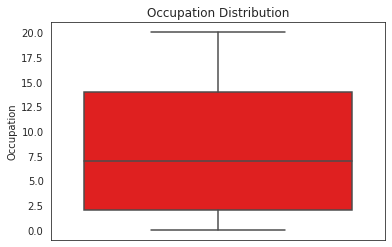

In [44]:
#Outlier Detection
sns.boxplot(data=df,y='Occupation',color='r')
plt.title('Occupation Distribution')
plt.show()

Most of the purchases made by the people who does occupatuion in the range of 7.5

While occupation of customers is in the range if 2.5 to 15

In [45]:
#insight for female
df_female=df[df['Gender']=='F']
df_male=df[df['Gender']=='M']
df_female

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
...,...,...,...,...,...,...,...,...,...,...
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [46]:
df_female.describe(include='category')

,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status
count,135809,135809,135809,135809,135809
unique,1,7,3,5,2
top,F,26-35,B,1,0
freq,135809,50752,57796,51298,78821


Number of female customer:135809


Most of the female customers(50752) are in the range 26-35 

Most of the female customers belong to city B

Most of the female customers live in the current city for a year

Most of the female customers are unmarried

In [47]:
df_female.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,1.358090e+05,135809,135809,135809,135809.000000,135809,135809,135809.0,135809.000000,135809.000000
unique,NaN,3367,1,7,NaN,3,5,2.0,NaN,NaN
top,NaN,P00265242,F,26-35,NaN,B,1,0.0,NaN,NaN
freq,NaN,508,135809,50752,NaN,57796,51298,78821.0,NaN,NaN
mean,1.003130e+06,NaN,NaN,NaN,6.740540,NaN,NaN,NaN,5.717714,8734.565765
std,1.786631e+03,NaN,NaN,NaN,6.239639,NaN,NaN,NaN,3.696752,4767.233289
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,12.000000
25%,1.001569e+06,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,3.000000,5433.000000
50%,1.003159e+06,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,5.000000,7914.000000
75%,1.004765e+06,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,8.000000,11400.000000


By Female customers:

Most bought product:P00265242

Avergae purchase:8734.57

Max purchase:23959

Min purchase:12

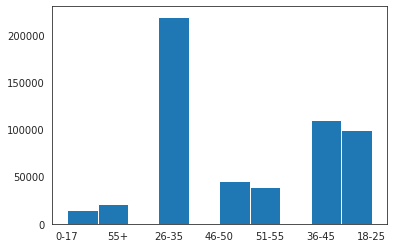

In [48]:
count,bins,patches=plt.hist(df['Age'])


(array([ 5083.,  9894.,     0., 27170.,     0., 50752., 24628.,     0.,
        13199.,  5083.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

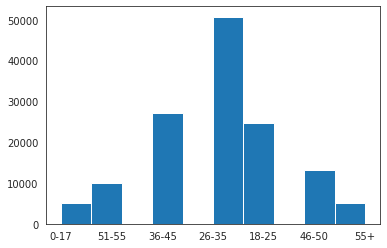

In [49]:
plt.hist(df_female['Age'])


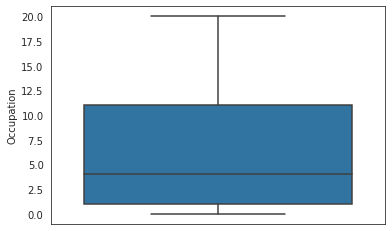

In [50]:

sns.boxplot(data=df_female,y='Occupation')


No outlier detected for female customer vs occupation

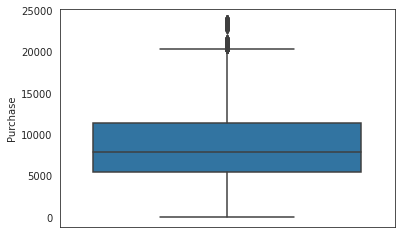

In [51]:

sns.boxplot(data=df_female,y='Purchase')


## Answering Questions

In [52]:
#Customerwise per transaction details
women_purchase_df=df_female.groupby(['User_ID'])['Purchase'].sum()
print(women_purchase_df.mean())


men_purchase_df=df_male.groupby(['User_ID'])['Purchase'].sum()
print(men_purchase_df.mean())



712024.3949579832
925344.4023668639


Men is spending more money than female

Average purchase of male is 9437.53

Average purchase of female is 8735.2

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(4), object(1)
memory usage: 23.6+ MB


### Using CLT

In [54]:
pop_mean_male=[]
pop_mean_female=[]
for i in range(1000):
  avg_mean1=df_male.sample(5000,replace=True)['Purchase'].mean()
  avg_mean2=df_female.sample(4000,replace=True)['Purchase'].mean()
  pop_mean_male.append(avg_mean1)
  pop_mean_female.append(avg_mean2)


Text(0.5, 1.0, 'Distribution of 4000 female samples')

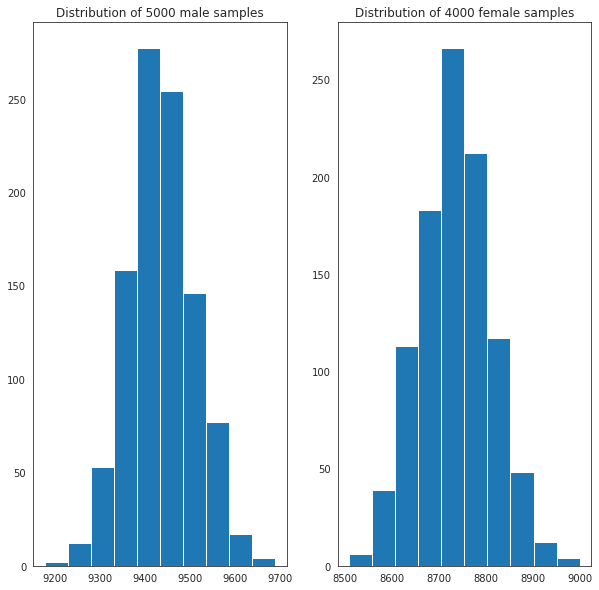

In [55]:
fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(10,10))
axis[0].hist(pop_mean_male,bins=10)
axis[0].set_title('Distribution of 5000 male samples')
axis[1].hist(pop_mean_female,bins=10)
axis[1].set_title('Distribution of 4000 female samples')

In [56]:
print('sample mean of male(predicting):'+str(np.mean(pop_mean_male)))
print('sample mean of female(predicting):'+str(np.mean(pop_mean_female)))
print('mean of male population:{0} and std is {1}'.format(round(df_male['Purchase'].mean(),2),round(df_male['Purchase'].std(),2)))
print('mean of female population:{0} and std is {1}'.format(round(df_female['Purchase'].mean(),2),round(df_female['Purchase'].std(),2)))


sample mean of male(predicting):9435.780409399998
sample mean of female(predicting):8735.361471
mean of male population:9437.53 and std is 5092.19
mean of female population:8734.57 and std is 4767.23


Inference:

1.Mean of sample distribution is 

In [57]:
std_sample_female=round(df_female['Purchase'].std()/np.sqrt(4000),2)
std_sample_male=round(df_male['Purchase'].std()/np.sqrt(5000),2)
stats.norm.interval(alpha=0.5,loc=np.mean(pop_mean_female),scale=std_sample_female)

(8684.518433630219, 8786.204508369781)

There is 95% confidence that average purchase power of female(8734.57) lies in interval(8682.81,8784.50)

In [58]:
stats.norm.interval(alpha=0.5,loc=np.mean(pop_mean_male),scale=std_sample_male)

(9387.21040248838, 9484.350416311618)

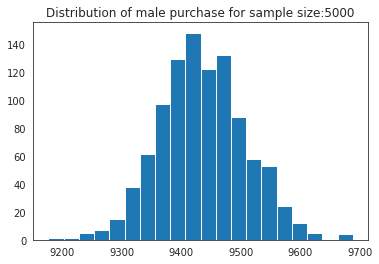

In [59]:


plt.hist(pop_mean_male,bins=20)
plt.title('Distribution of male purchase for sample size:5000')
plt.show()


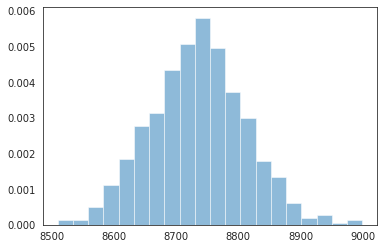

In [60]:
plt.hist(pop_mean_female, density=True, bins=20, alpha=0.5)
plt.show()

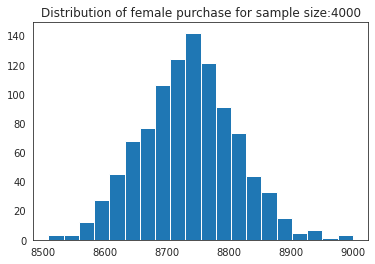

In [61]:
plt.hist(pop_mean_female,bins=20)
plt.title('Distribution of female purchase for sample size:4000')
plt.show()


### Marital status

In [62]:
df['Marital_Status'].value_counts()

unmarried_df=df[df['Marital_Status']==0]
married_df=df[df['Marital_Status']==1]


In [69]:
pop_mean_married=[]
pop_mean_unmarried=[]
for i in range(1000):
  avg_mean1=unmarried_df.sample(5000,replace=True)['Purchase'].mean()
  avg_mean2=married_df.sample(5000,replace=True)['Purchase'].mean()
  pop_mean_married.append(avg_mean1)
  pop_mean_unmarried.append(avg_mean2)


sample mean of unmarried(predicting):9259.712338
sample mean of married(predicting):9269.5514726
mean of unmarried population:9265.91 and std is 5027.35
mean of married population:9261.17 and std is 5016.9


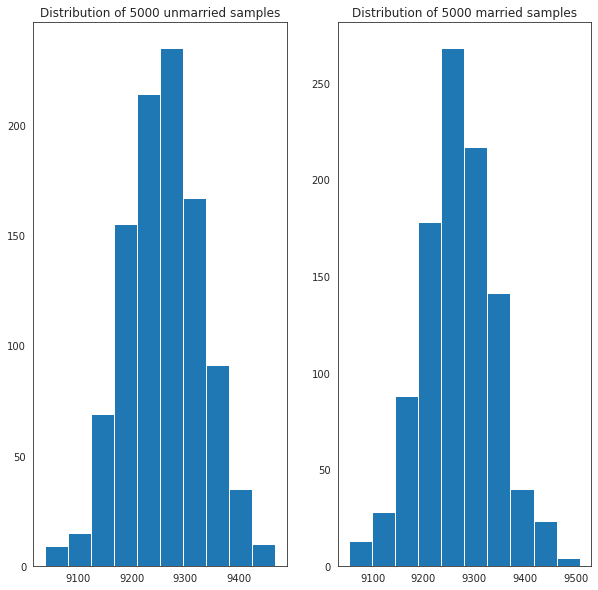

In [70]:
fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(10,10))
axis[0].hist(pop_mean_unmarried,bins=10)
axis[0].set_title('Distribution of 5000 unmarried samples')
axis[1].hist(pop_mean_married,bins=10)
axis[1].set_title('Distribution of 5000 married samples')
print('sample mean of unmarried(predicting):'+str(np.mean(pop_mean_unmarried)))
print('sample mean of married(predicting):'+str(np.mean(pop_mean_married)))
print('mean of unmarried population:{0} and std is {1}'.format(round(unmarried_df['Purchase'].mean(),2),round(unmarried_df['Purchase'].std(),2)))
print('mean of married population:{0} and std is {1}'.format(round(married_df['Purchase'].mean(),2),round(married_df['Purchase'].std(),2)))


sample mean of unmarried(predicting):9262.6705285

sample mean of married(predicting):9268.142732799999

mean of unmarried population:9265.91 and std is 5027.35

mean of married population:9261.17 and std is 5016.9

In [75]:
std_sample_married=round(married_df['Purchase'].std()/np.sqrt(5000),2)
std_sample_unmarried=round(unmarried_df['Purchase'].std()/np.sqrt(5000),2)

print('90% probability')
print('ci for unmarried:'+str(stats.norm.interval(alpha=0.90,loc=np.mean(pop_mean_unmarried),scale=std_sample_unmarried)))
print('ci for married:'+str(stats.norm.interval(alpha=0.90,loc=np.mean(pop_mean_married),scale=std_sample_married)))
print('95% probability')
print('ci for unmarried:'+str(stats.norm.interval(alpha=0.95,loc=np.mean(pop_mean_unmarried),scale=std_sample_unmarried)))
print('ci for married:'+str(stats.norm.interval(alpha=0.95,loc=np.mean(pop_mean_married),scale=std_sample_married)))
print('99% probability')
print('ci for unmarried:'+str(stats.norm.interval(alpha=0.99,loc=np.mean(pop_mean_unmarried),scale=std_sample_unmarried)))
print('ci for married:'+str(stats.norm.interval(alpha=0.99,loc=np.mean(pop_mean_married),scale=std_sample_married)))

90% probability
ci for unmarried:(9142.76324512375, 9376.66143087625)
ci for married:(9152.849107767794, 9386.253837432207)
95% probability
ci for unmarried:(9120.358898699202, 9399.065777300797)
ci for married:(9130.492027896884, 9408.610917303116)
99% probability
ci for unmarried:(9076.570874517673, 9442.853801482326)
ci for married:(9086.796383513205, 9452.306561686795)


90% probability

ci for unmarried:(9142.76, 9376.66)

ci for married:(9152.84, 9386.25)

95% probability

ci for unmarried:(9120.36, 9399.065)

ci for married:(9130.49, 9408.61)

99% probability

ci for unmarried:(9076.57, 9442.85)

ci for married:(9086.79, 9452.30)

### Age Group

In [93]:
#Confidence Interval for age group
age_list=[]
age=df['Age'].unique()

for i in age:
  print('For age:'+str(i))
  age_list=[]
  for k in range(1000):
    avg_mean1=df[df['Age']==i]['Purchase'].sample(5000,replace=True).mean()
    age_list.append(avg_mean1)
    std=df[df['Age']==i]['Purchase'].std()

  for j in [0.90,0.95,0.99]:
    print(f"{j*100}% Confidence Interval:"+str(stats.norm.interval(alpha=j,loc=np.mean(age_list),scale=round(std/np.sqrt(5000),2))))
    
  

For age:0-17
90.0% C:(8816.515809643946, 9054.29584995605)
95.0% C:(8793.739632997444, 9077.072026602553)
99.0% C:(8749.224887739483, 9121.586771860513)
For age:55+
90.0% C:(9217.12832705795, 9450.26988014205)
95.0% C:(9194.796456015647, 9472.601751184353)
99.0% C:(9151.15008085749, 9516.24812634251)
For age:26-35
90.0% C:(9135.882188594218, 9368.99084460578)
95.0% C:(9113.553468655491, 9391.319564544507)
99.0% C:(9069.913252150523, 9434.959781049474)
For age:46-50
90.0% C:(9092.49078910666, 9323.59272369334)
95.0% C:(9070.354286486061, 9345.729226313939)
99.0% C:(9027.08974782569, 9388.99376497431)
For age:51-55
90.0% C:(9415.161384540841, 9651.85582145916)
95.0% C:(9392.489194312344, 9674.528011687657)
99.0% C:(9348.177684609656, 9718.839521390344)
For age:36-45
90.0% C:(9214.366570877637, 9448.034477122363)
95.0% C:(9191.98428217812, 9470.41676582188)
99.0% C:(9148.239368568922, 9514.161679431078)
For age:18-25
90.0% C:(9055.747055961054, 9289.974212438943)
95.0% C:(9033.31119850074

NameError: ignored

From above,we can identify that purchasing power of unmarried and married people are overlapping